# Phase 3 :
# Classification:

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Dataset/The_Processed_data.csv');
print(df)

      Unnamed: 0  Patient ID   Age  Sex   Cholesterol  Systolic BP  \
0              0         241     1    1             0     0.755556   
1              1         455     2    1             1     0.833333   
2              2         247     2    0             1     0.933333   
3              3        1468     1    1             1     0.811111   
4              4         972     1    1             1     0.011111   
...          ...         ...   ...  ...           ...          ...   
3995        3995        3099     1    1             0     0.911111   
3996        3996        2881     0    0             2     0.211111   
3997        3997         400     1    1             2     0.700000   
3998        3998         623     1    1             1     0.211111   
3999        3999        3387     0    0             2     0.111111   

      Diastolic BP   Heart Rate  Diabetes  Family History  Smoking  Diet  \
0             0.56     0.457143         0               0        1     0   
1      

# Split the data into features and target variable

The code separates the features from the target variable, where X contains the features (all columns except the last one), and y contains the target variable "Heart Attack Risk."

In [2]:
fn= df.keys().tolist()[:-1]
X= df[fn]
y=df["Heart Attack Risk"]
print(X)

      Unnamed: 0  Patient ID   Age  Sex   Cholesterol  Systolic BP  \
0              0         241     1    1             0     0.755556   
1              1         455     2    1             1     0.833333   
2              2         247     2    0             1     0.933333   
3              3        1468     1    1             1     0.811111   
4              4         972     1    1             1     0.011111   
...          ...         ...   ...  ...           ...          ...   
3995        3995        3099     1    1             0     0.911111   
3996        3996        2881     0    0             2     0.211111   
3997        3997         400     1    1             2     0.700000   
3998        3998         623     1    1             1     0.211111   
3999        3999        3387     0    0             2     0.111111   

      Diastolic BP   Heart Rate  Diabetes  Family History  Smoking  Diet  \
0             0.56     0.457143         0               0        1     0   
1      

# Information Gain (entropy):
# Splitting Data into: 70% Training and 30% Test

The model is trained utilizing the information gain(entropy), and the dataset is divided into 70% training and 30% testing subsets.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create decision tree classifer object:
clf_entropy = DecisionTreeClassifier(criterion='entropy')

#Train decision tree classifer
clf_entropy= clf_entropy.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_entropy = clf_entropy.predict (X_test)

# confusion matrix:


[[361 265]
 [286 288]]


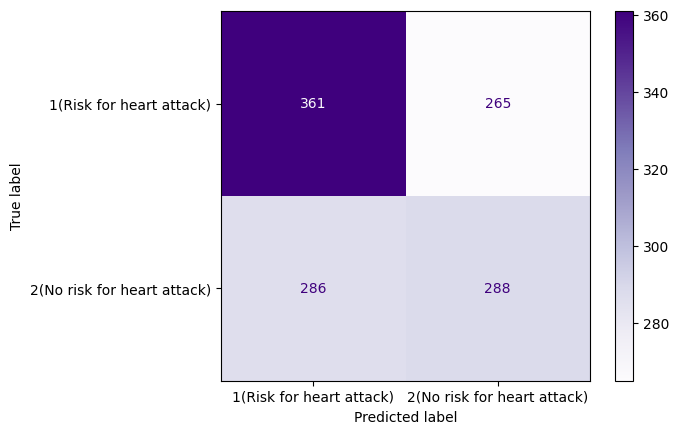

In [4]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_entropy)
print(cm)

class_labels = {1: '1(Risk for heart attack)', 2: '2(No risk for heart attack)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[2]])

disp.plot(cmap=plt.cm.Purples)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

The top-left cell (361): Represents the number of instances of the negative class correctly classified as negative (True Negatives - TN). This means that 361 instances that do not have a risk of heart attack were correctly identified as such.

The top-right cell (265): Represents the number of instances of the negative class incorrectly classified as positive (False Positives - FP). This indicates that 265 instances that are not at risk were mistakenly predicted to have a risk of heart attack.

The bottom-left cell (286): Represents the number of instances of the positive class incorrectly classified as negative (False Negatives - FN). This shows that 286 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

The bottom-right cell (288): Represents the number of instances of the positive class correctly classified as positive (True Positives - TP). This means that 288 instances that are at risk for heart attack were correctly identified as being at risk.

# Decision Tree:

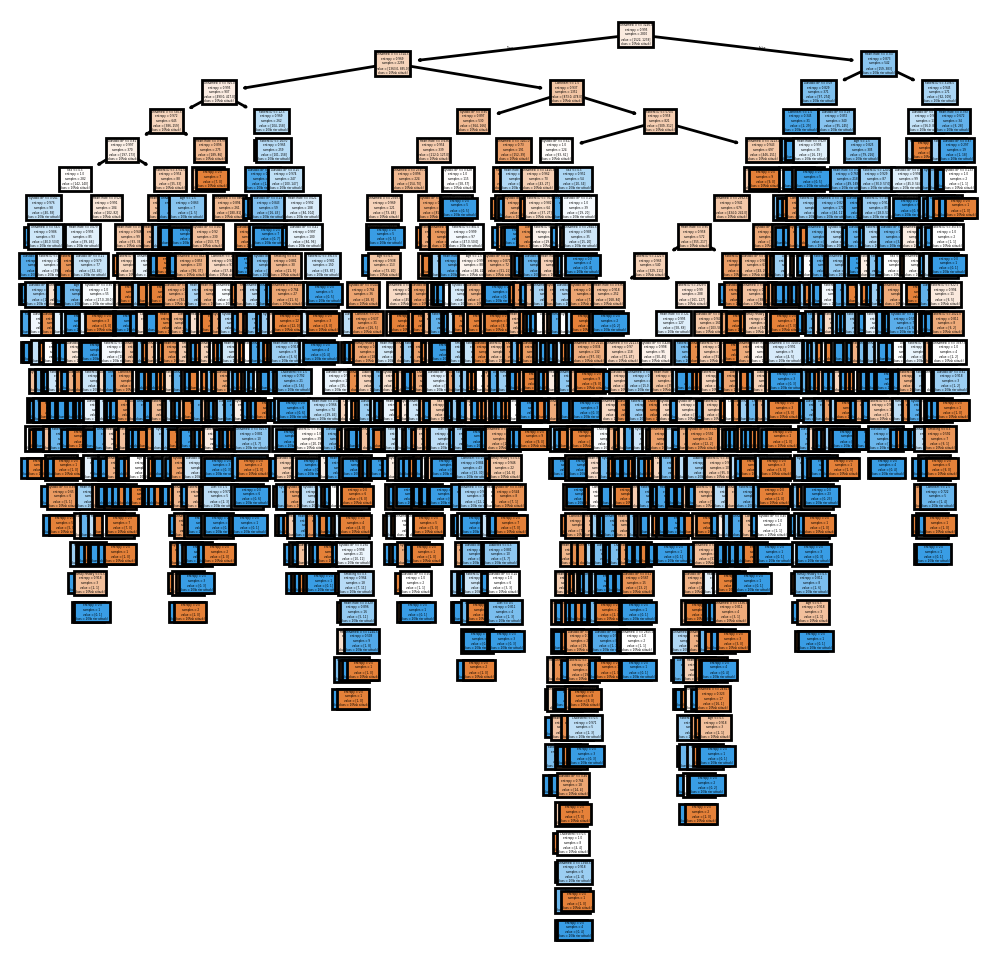

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)


class_labels = {1: '1(Risk attack)' , 2:'2(No risr attack)'}

tree.plot_tree(clf_entropy,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[2]], 
               filled=True
               )

plt.show()

The result of the code is a visual representation of a decision tree that illustrates how the data is split based on different features to determine the risk of heart attack. The tree begins at the root node, where the first feature is evaluated, and continues to branch out based on specific threshold values for various attributes, such as Total Bilirubin and SGOT. Each internal node represents a decision point based on a feature, while the leaf nodes indicate the final classification: whether there is a risk (1) or no risk (2) of heart attack. 

Overall, this decision tree provides insight into how the model makes classifications based on different health indicators, making it a valuable tool for understanding and interpreting heart attack risk assessments.

# Completing in model evaluation and selection:


In [7]:
# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_entropy)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

Accuracy: 0.5408333333333334
Error Rate: 0.4591666666666666
Sensitivity: 0.5017421602787456
Specificity: 0.5766773162939297
Precision: 0.5207956600361664


- Accuracy: This metric indicates the proportion of correct predictions made by the model. In this instance, the model achieves an accuracy of approximately 54%.

- Error Rate: This represents the proportion of incorrect predictions relative to all predictions made. In this case, the error rate is about 45%.

- Sensitivity (Recall): This measures the percentage of actual positive cases that are correctly identified by the model. Here, the sensitivity is approximately 50%.

- Specificity: This metric assesses the proportion of actual negative cases that are correctly identified. In this scenario, specificity is around 57%.

- Precision: This indicates the ratio of positive predictions that are actually correct. In this case, the precision is about 52%.


Results:
The model shows moderate accuracy, successfully predicting the correct class classification for about 54% of cases.

At a sensitivity of 50%, the model shows good ability to identify positive cases of the condition. Conversely, its specificity is significantly higher at 57%, indicating that it is relatively efficient at identifying negative cases or cases without risk for heart attack.

The accuracy rate was recorded at 52%, indicating moderate predictions made by the model. Overall, these metrics suggest that the model has a reasonable level of effectiveness in distinguishing between positive and negative cases.

# Splitting Data into: 60% Training and 40% Test:

The model is trained utilizing the information gain(entropy), and the dataset is divided into 60% training and 40% testing subsets.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf2 = DecisionTreeClassifier(criterion='entropy')

clf2 = clf2. fit (X_train, y_train)

y_pred_entropy2 = clf2.predict (X_test)

# confusion matrix:

[[480 368]
 [376 376]]


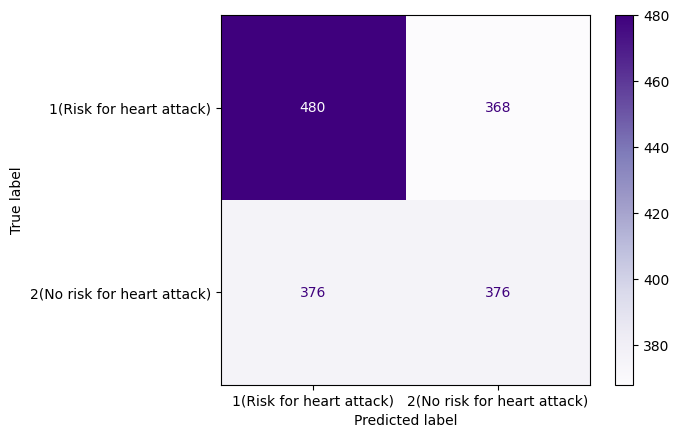

In [9]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_entropy2)
print(cm)

class_labels = {1: '1(Risk for heart attack)', 2: '2(No risk for heart attack)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[2]])

disp.plot(cmap=plt.cm.Purples)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

The top-left cell (480): Represents the number of instances of the negative class correctly classified as negative (True Negatives - TN). This means that 480 instances that do not have a risk of heart attack were correctly identified as such.

The top-right cell (368): Represents the number of instances of the negative class incorrectly classified as positive (False Positives - FP). This indicates that 368 instances that are not at risk were mistakenly predicted to have a risk of heart attack.

The bottom-left cell (376): Represents the number of instances of the positive class incorrectly classified as negative (False Negatives - FN). This shows that 376 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

The bottom-right cell (376): Represents the number of instances of the positive class correctly classified as positive (True Positives - TP). This means that 376 instances that are at risk for heart attack were correctly identified as being at risk.

# Decision Tree:

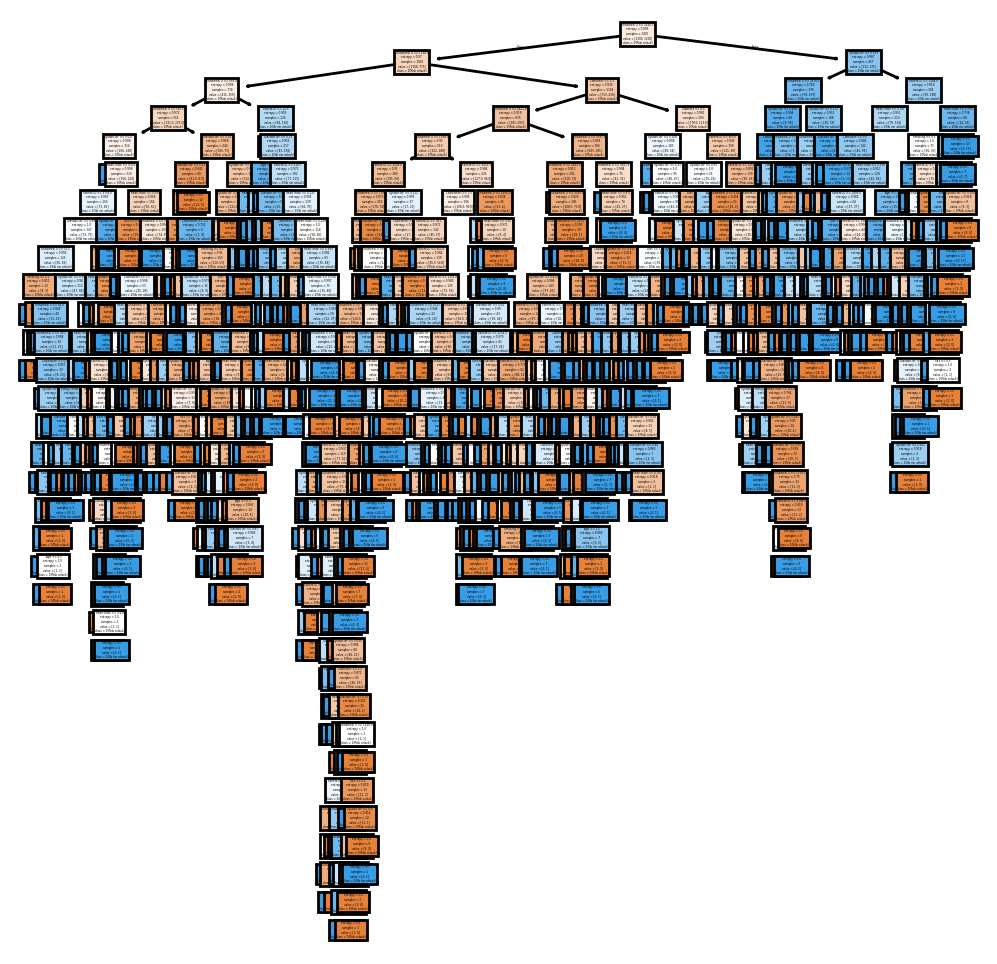

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)


class_labels = {1: '1(Risk attack)' , 2:'2(No risr attack)'}

tree.plot_tree(clf2,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[2]], 
               filled=True
               )

plt.show()

The decision tree starts with the root node labeled "TB," which serves as the basis for branching out according to TB values. As the tree progresses, it makes multiple splits at decision nodes, with the selection of features at each node driven by their entropy.

At the end of these branches are the leaf nodes, which act as terminal points providing the final classification based on the path taken through the tree. Each leaf node displays a class label ('1' or '2'), indicating the model's prediction regarding the presence or absence of the condition. Overall, the tree structure effectively represents the decision-making process for classification based on the specified features.

# Completing in model evaluation and selection:

In [11]:
# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_entropy2)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

Accuracy: 0.535
Error Rate: 0.46499999999999997
Sensitivity: 0.5
Specificity: 0.5660377358490566
Precision: 0.5053763440860215


- Accuracy: This metric indicates the proportion of correct predictions made by the model. In this instance, the model achieves an accuracy of approximately 53%.

- Error Rate: This represents the proportion of incorrect predictions relative to all predictions made. In this case, the error rate is about 46%.

- Sensitivity (Recall): This measures the percentage of actual positive cases that are correctly identified by the model. Here, the sensitivity is approximately 50%.

- Specificity: This metric assesses the proportion of actual negative cases that are correctly identified. In this scenario, specificity is around 56%.

- Precision: This indicates the ratio of positive predictions that are actually correct. In this case, the precision is about 50%.

Results:
The model shows moderate accuracy, successfully predicting the correct class classification for about 53% of cases.

At a sensitivity of 50%, the model shows good ability to identify positive cases of the condition. Conversely, its specificity is significantly higher at 56%, indicating that it is relatively efficient at identifying negative cases or cases without risk for heart attack.

The accuracy rate was recorded at 50%, indicating moderate predictions made by the model. Overall, these metrics suggest that the model has a reasonable level of effectiveness in distinguishing between positive and negative cases.